In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install pyglet
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.1/853.1 kB 14.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import pyglet
from pyglet import gl
from pyglet import image
import imageio

Inicializando Display


In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

1 - Pesquise e apresente um trabalho sobre o aprendizagem por reforço profundo



Estado inicial: 373


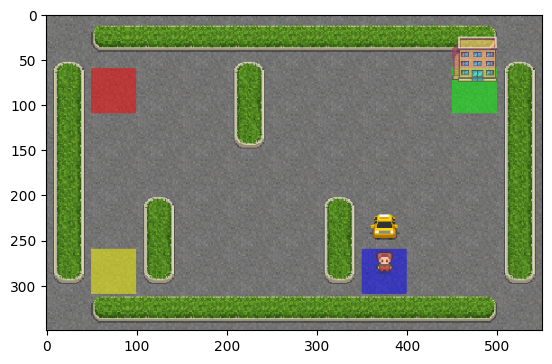

In [ ]:
env = gym.make("Taxi-v3")
env.reset()
counter = 0
reward = None
g = 0

# Imprima o estado inicial
print("Estado inicial:", env.env.s)

# Exiba uma representação gráfica básica do ambiente
plt.imshow(env.render(mode='rgb_array'))
plt.show()


Agente:

Pegar o passageiro e transportar até o local de destino
Ambiente:

4 posições fixas para pegar (saída) ou largar (chegada) o passageiro,
Alguns muros.
Estados:

500 possíveis combinações que o ambiente pode assumir

Ações

0 = sul (mover taxi para baixo)

1 = norte (mover taxi para cima)

2 = leste (mover taxi para direita)

3 = oeste (mover taxi para esquerda)

4 = pegar o passageiro

5 = largar o passageiro


In [ ]:
print("Total de Ações {}".format(env.action_space))
print("Total de Estados {}".format(env.observation_space))

Total de Ações Discrete(6)
Total de Estados Discrete(500)


### Função de reforço

Valor de reforço para cada combinação de estado X ação (ou seja, uma tabela com 500 * 6 = 3000 posições no caso deste problema)

[(sempre_um, próximo_estado, valor_do_reforço, atingiu_o_objetivo)]

Possíveis punições:
* -1 : Cada movimento feito pelo carro ou tentativa de bater no muro
* -10 : Pegar ou largar o passageiro no lugar errado

Possíveis recompensas:
* +20 : Deixar o passageiro no lugar certo


In [ ]:
env.P[329]

{0: [(1.0, 429, -1, False)],
 1: [(1.0, 229, -1, False)],
 2: [(1.0, 349, -1, False)],
 3: [(1.0, 329, -1, False)],
 4: [(1.0, 329, -10, False)],
 5: [(1.0, 329, -10, False)]}

Resolvendo o ambiente Aleatoriamente

In [ ]:
# Configurações do ambiente
window = pyglet.window.Window(visible=False)
width, height = env.render(mode='rgb_array').shape[1:3]
video_writer = imageio.get_writer('Resolução_Aleatoria.mp4', fps=60)

@window.event
def on_draw():
    window.clear()
    gl.glClearColor(1, 1, 1, 1)  # Define a cor de fundo para branco
    frame = env.render(mode='rgb_array')
    image = pyglet.image.ImageData(width, height, 'RGB', frame.tobytes(), pitch=width * -3)
    image.blit(0, 0)

state = env.reset()

while reward != 20:
    state, reward, done, info = env.step(env.action_space.sample())
    counter += 1
    g += reward
    window.switch_to()
    window.dispatch_events()
    window.dispatch_event('on_draw')
    window.flip()

    video_writer.append_data(env.render(mode='rgb_array'))
video_writer.close()
env.close()
print("Resolvido em {} passos com uma recompensa total de {}".format(counter,g))

Resolvido em 3909 passos com uma recompensa total de -15372


Video Resolvendo Ambiente Aleatorio

https://drive.google.com/file/d/1iwsML1J2AWQWaWrtjCj6Lv3o6KfAukLR/view?usp=drive_link

In [ ]:
import gym
import pyglet
from pyglet import gl
from pyglet import image
import imageio

env = gym.make("Taxi-v3")
env.reset()
counter = 0
reward = None
g = 0

In [ ]:
env = gym.make("Taxi-v3")
n_states = env.observation_space.n
n_actions = env.action_space.n

In [ ]:
_states = env.observation_space.n
n_actions = env.action_space.n

In [ ]:
# Configurações do ambiente
window = pyglet.window.Window(visible=False)
width, height = env.render(mode='rgb_array').shape[1:3]
video_writer = imageio.get_writer('videeeo.mp4', fps=60)

@window.event
def on_draw():
    window.clear()
    gl.glClearColor(1, 1, 1, 1)  # Define a cor de fundo para branco
    frame = env.render(mode='rgb_array')
    image = pyglet.image.ImageData(width, height, 'RGB', frame.tobytes(), pitch=width * -3)
    image.blit(0, 0)

# Vamos analisar apenas um episódio e ver como os valores de Q mudam após cada etapa usando a fórmula abaixo

In [ ]:
Q = np.zeros([n_states, n_actions])

# Esta matriz multidimensional manterá um histórico de nossos Q-Values para todos os estados
Q_hist = np.zeros([n_states, n_actions, 0])


episodes = 1
G = 0
alpha = 0.618

for episode in range(1,episodes+1):
    done = False
    G, reward = 0,0
    state = env.reset()
    firstState = state
    print("Initial State = {}".format(state))
    while reward != 20:
        action = np.argmax(Q[state])
        state2, reward, done, info = env.step(action)
        Q[state,action] += alpha * (reward + np.max(Q[state2]) - Q[state,action])
        G += reward
        state = state2
        # Isso manterá um histórico de Q Values em uma matriz multidimensional
        Q_hist = np.dstack((Q_hist, Q))
finalState = state
print("Final State = {}".format(finalState))

Initial State = 287
Final State = 475


In [ ]:
env.P[firstState]

{0: [(1.0, 394, -1, False)],
 1: [(1.0, 194, -1, False)],
 2: [(1.0, 294, -1, False)],
 3: [(1.0, 274, -1, False)],
 4: [(1.0, 294, -10, False)],
 5: [(1.0, 294, -10, False)]}

In [ ]:
print(firstState)
Q_hist[firstState,:,0]

294


array([-0.618,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [ ]:
Q_hist.shape

(500, 6, 653)

In [ ]:
print(finalState)
Q_hist[finalState,:,Q_hist.shape[2]-1]

410


array([0., 0., 0., 0., 0., 0.])

In [ ]:
episodes = 2000
rewardTracker = []

G = 0
alpha = 0.618

for episode in range(1,episodes+1):
    done = False
    G, reward = 0,0
    state = env.reset()
    while done != True:
        action = np.argmax(Q[state])
        state2, reward, done, info = env.step(action)
        Q[state,action] += alpha * ((reward + (np.max(Q[state2]))  - Q[state,action]))
        G += reward
        state = state2

    if episode % 100 == 0:
        print('Episode {} Total Reward: {}'.format(episode,G))



Episode 100 Total Reward: -307
Episode 200 Total Reward: 8
Episode 300 Total Reward: -24
Episode 400 Total Reward: 0
Episode 500 Total Reward: 3
Episode 600 Total Reward: 7
Episode 700 Total Reward: 4
Episode 800 Total Reward: 7
Episode 900 Total Reward: 9
Episode 1000 Total Reward: 11
Episode 1100 Total Reward: 10
Episode 1200 Total Reward: 12
Episode 1300 Total Reward: 11
Episode 1400 Total Reward: 5
Episode 1500 Total Reward: 7
Episode 1600 Total Reward: 11
Episode 1700 Total Reward: 7
Episode 1800 Total Reward: 7
Episode 1900 Total Reward: 5
Episode 2000 Total Reward: 14


In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [ ]:
state = env.reset()
done = None
import time

# Configurações do ambiente
window = pyglet.window.Window(visible=False)
width, height = env.render(mode='rgb_array').shape[1:3]
video_writer = imageio.get_writer('Treinada.mp4', fps=2)

@window.event
def on_draw():
    window.clear()
    gl.glClearColor(1, 1, 1, 1)  # Define a cor de fundo para branco
    frame = env.render(mode='rgb_array')
    image = pyglet.image.ImageData(width, height, 'RGB', frame.tobytes(), pitch=width * -3)
    image.blit(0, 0)

while done != True:
    # Simplesmente tomamos a ação com o valor Q mais alto
    print(state)
    action = np.argmax(Q[state])
    print(Q[state])
    state, reward, done, info = env.step(action)
    window.switch_to()
    window.dispatch_events()
    window.dispatch_event('on_draw')
    window.flip()
    video_writer.append_data(env.render(mode='rgb_array'))
    time.sleep(0.1)  # Pausa de 0.1 segundos
video_writer.close()
env.close()


166
[ -7.22979742  -7.22381165   9.          -7.31341797 -12.36
 -12.36      ]
186
[ -6.75964069  10.          -6.798       -7.14156985 -12.36
 -12.36      ]
86
[-6.20309955 -6.18       -6.18       -6.00338336 11.         -6.18      ]
98
[12.         -5.562      -5.562      -5.07150655 -6.18       -5.49054886]
198
[-4.48935895 -4.90826729 -4.326      13.         -6.18       -6.18      ]
178
[14.         -4.63592936 -4.040425   -3.84030661 -6.18       -6.18      ]
278
[-4.0918443  -3.36551785 -3.90769746 15.         -6.18       -6.18      ]
258
[-2.97042157 -2.90969176 -2.71619491 16.         -6.18       -6.18      ]
238
[-2.48515958 -2.59660539 -2.87521358 17.         -6.18       -6.18      ]
218
[18.         -1.854      -1.99989497 -1.854      -6.18       -6.18      ]
318
[19.       -1.617924 -1.236    -1.236    -6.18     -6.18    ]
418
[-0.618 -0.618 -0.618 -0.618 -6.18  20.   ]


In [ ]:
print(418)
env.P[418]

418


{0: [(1.0, 418, -1, False)],
 1: [(1.0, 318, -1, False)],
 2: [(1.0, 418, -1, False)],
 3: [(1.0, 418, -1, False)],
 4: [(1.0, 418, -10, False)],
 5: [(1.0, 410, 20, True)]}

https://drive.google.com/file/d/125laDHCNs0MCxzcAd2wawJZc9T91a_XU/view?usp=sharing